<a href="https://colab.research.google.com/github/NIMZ-tech/Data_Analysis.Project1/blob/main/Google_Play_store_App's_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Google Play store App's Analysis
 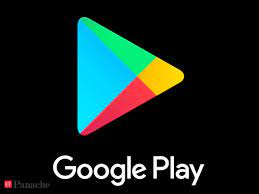
Here is the data of more than 10,000 app's in google play store.The problem is to identify the app's that are going to be good for google to promote  App rating, which are provided by the customers, is always a great indicator of the goodness of the App. The problem reduces to predict which apps will have high rating.
##### The Google Play Store is the official pre-installed app on Android devices which provides access to the Google Play store. It allows users to browse and download music, books, magazines, movies, television programs, and applications from Google Play. The Devices segment of Google Play is not accessible through the Play Store. With the introduction of Google Play on 6 March 2012, the Android Market app on old devices was upgraded to the Google Play Store app.

Play Store filters the list of applications to those compatible with the user's device. In addition, users may face further restrictions to choice of applications where developers have tied-in their applications to particular carriers or countries for business reasons. Carriers can also ban certain applications, for example tethering applications.
# Content:
##Dataset: Google Play Store Data
##Fields in the data:
###App: Application Name
###Category: Category to which the app belongs
###Rating: Overall user rating of the app
###Reviews: Number of user reviews for the app
###Size: Size of the app
###Installs: Number of user downloads/ installs for the app
###Type: Paid or Free
###Price: Price of the App
###Content Rating: Age group the app is targeted at children/adult
###Genres: An app can belong to multiple genres
exaple: music,game,family genres
###Last Updated: Data when the app was last updated on play store
###Current Version: Current version of the app available of play store
###Android Version: Minimum required Android version

In [ ]:
#import all the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Questions for analysis
##### *How many app's on the playstore free to download?
##### *Which category has most app on the google playstore?
##### *What is the average rating of app's per category?
##### *What is the price of App's per Category?
##### *what is the count of installation of paid app? -->
##### *which category of app's mostly installed and least install?
##### *which paid category is most and which is least in number?
##### *Find the content rating of app's?
##### *Find the distribution of paid app and its price? 
##### *What is the total installation of medical Genres?
##### *Find the app's category with more than 10,000,000 downloads?
##### *What is the median rating of free app's and paid app's?
##### *How many app's in the data set are Android Version?
##### *What is the total price of family category apps?
##### *What is the total price of Medical category apps?
##### *Find the relaion of all numerical values in the dataset?

#Data Download
#### csv file for data is collected from Kaggle.com

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Google Apps _Analysis/googleplaystore.csv.zip')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


#Data Preparation & Cleaning

In [ ]:
#Total number of columns
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
#shape of the dataset
df.shape

(10841, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
#null values handle
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
df.isnull().sum()[df.isnull().sum() !=0]

Rating            1474
Type                 1
Content Rating       1
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
#null values fill with zero
df['Rating']=df['Rating'].fillna(0)
df.Rating.value_counts()


0.0     1474
4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.6       25
2.7       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
1.8        8
1.7        8
2.1        8
1.6        4
1.5        3
1.4        3
1.2        1
19.0       1
Name: Rating, dtype: int64

1474 null values of Rating are filled with zero.This is the way to handle null values in my dataset

In [ ]:
#check how many rating are more than 5-Outliers
df[df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
df.drop([10472],inplace=True)



Removed the row with outliers more than 5 in Rating

In [ ]:
#convert price and reviews into numerical values
df['Price']=df['Price'].apply(lambda x:str(x).replace('$','') if '$' in str(x) else str(x))
df['Price']=df['Price'].apply(lambda x:float(x))
df['Reviews']=pd.to_numeric(df['Reviews'],errors='coerce')

In [ ]:
df['Installs']=df['Installs'].apply(lambda x:str(x).replace('+','')if '+' in str(x) else str(x))
df['Installs']=df['Installs'].apply(lambda x:str(x).replace(',','')if ',' in str(x) else str(x))
df['Installs']=df['Installs'].apply(lambda x: float(x))


#Univariate Analysis

In [ ]:
df.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,3.621771,4.441529e+05,1.546434e+07,1.027368
std,1.514563,2.927761e+06,8.502936e+07,15.949703
min,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,3.700000,3.800000e+01,1.000000e+03,0.000000
50%,4.200000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [ ]:
df.Type.describe()

count     10839
unique        2
top        Free
freq      10039
Name: Type, dtype: object

In [ ]:
df.Type.unique()

array(['Free', 'Paid', nan], dtype=object)

In [ ]:
df.Type.value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

#Analysis & Visualization

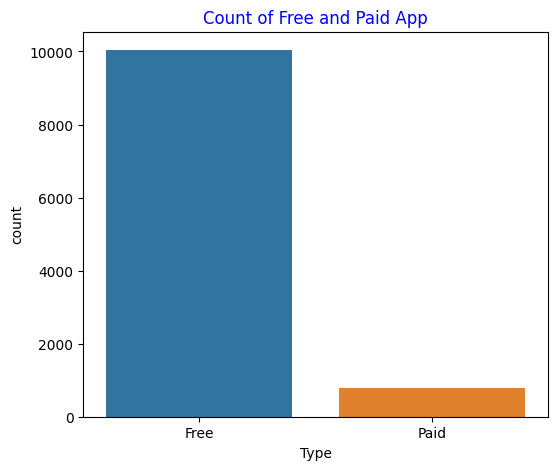

In [ ]:
plt.figure(figsize=(6,5))
plt.style.use('default')
plt.title('Count of Free and Paid App',color='blue')
sns.countplot(x='Type',data=df)
plt.savefig('type_app')
plt.show()

 Out of 10841 we have almost 10000 of them are free to download.92% App's in google playstore are free to download.

In [ ]:
df.Category.describe()

count      10840
unique        33
top       FAMILY
freq        1972
Name: Category, dtype: object

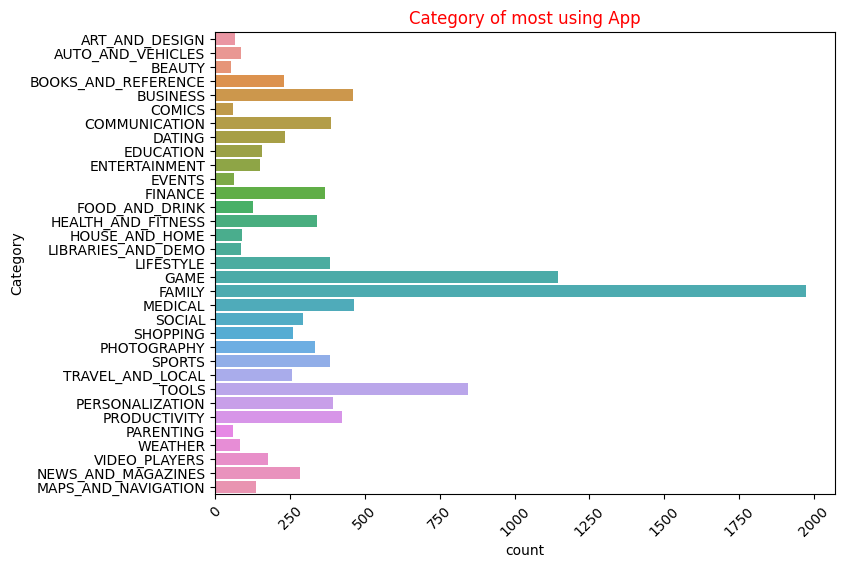

In [ ]:
plt.figure(figsize=(8,6))
plt.style.use('default')
plt.title('Category of most using App',color='red')
plt.xticks(rotation=45)
sns.countplot(y='Category',data=df)
plt.xticks(rotation=45)
plt.savefig('cate_app')

plt.show()

The family category has the most app's on the google play store.game is second position category.

In [ ]:
df.Rating.describe()

count    10840.000000
mean         3.621771
std          1.514563
min          0.000000
25%          3.700000
50%          4.200000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

In [ ]:
df.Installs.describe()

count    1.084000e+04
mean     1.546434e+07
std      8.502936e+07
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [ ]:
grp=df.groupby('Category')
x=grp['Rating'].agg(np.mean)
y=grp['Price'].agg(np.sum)
z=grp['Reviews'].agg(np.mean)
print(x)
print(y)
print(z)


Category
ART_AND_DESIGN         4.156923
AUTO_AND_VEHICLES      3.598824
BEAUTY                 3.390566
BOOKS_AND_REFERENCE    3.348918
BUSINESS               2.714783
COMICS                 4.016667
COMMUNICATION          3.524548
DATING                 3.308974
EDUCATION              4.360897
ENTERTAINMENT          4.126174
EVENTS                 3.118750
FAMILY                 3.713945
FINANCE                3.646448
FOOD_AND_DRINK         3.576378
GAME                   4.110227
HEALTH_AND_FITNESS     3.725220
HOUSE_AND_HOME         3.625000
LIBRARIES_AND_DEMO     3.195294
LIFESTYLE              3.365969
MAPS_AND_NAVIGATION    3.667153
MEDICAL                3.166739
NEWS_AND_MAGAZINES     3.402120
PARENTING              3.583333
PERSONALIZATION        3.473214
PHOTOGRAPHY            3.966866
PRODUCTIVITY           3.486321
SHOPPING               3.899231
SOCIAL                 3.736271
SPORTS                 3.508594
TOOLS                  3.524081
TRAVEL_AND_LOCAL       3.599612

Text(0, 0.5, 'Rating-->')

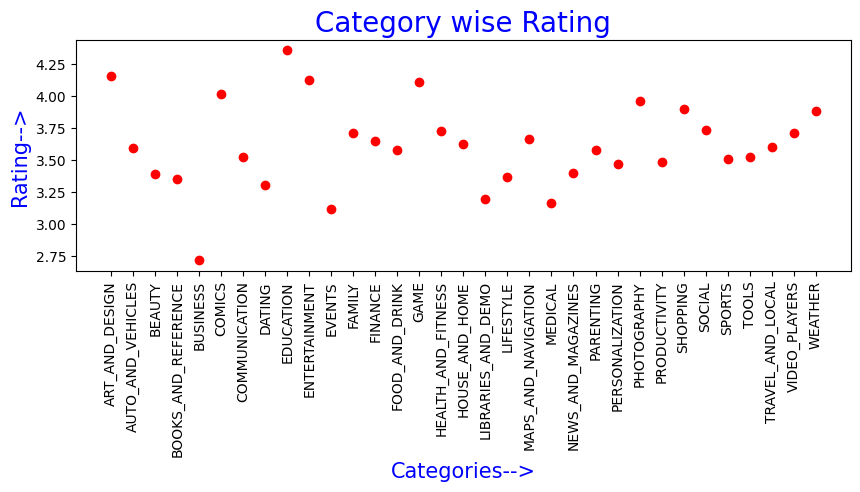

In [ ]:
plt.figure(figsize=(10,3))
plt.style.use('default')
plt.plot(x,'ro',color='r')
plt.xticks(rotation=90)
plt.title('Category wise Rating',color='blue',size='20')
plt.xlabel('Categories-->',color='blue',size=15)
plt.ylabel('Rating-->',color='blue',size=15)


The average rating of app's category are 4.1.compare to all other categories the rating of dating category is least. The rating of events category is higest.

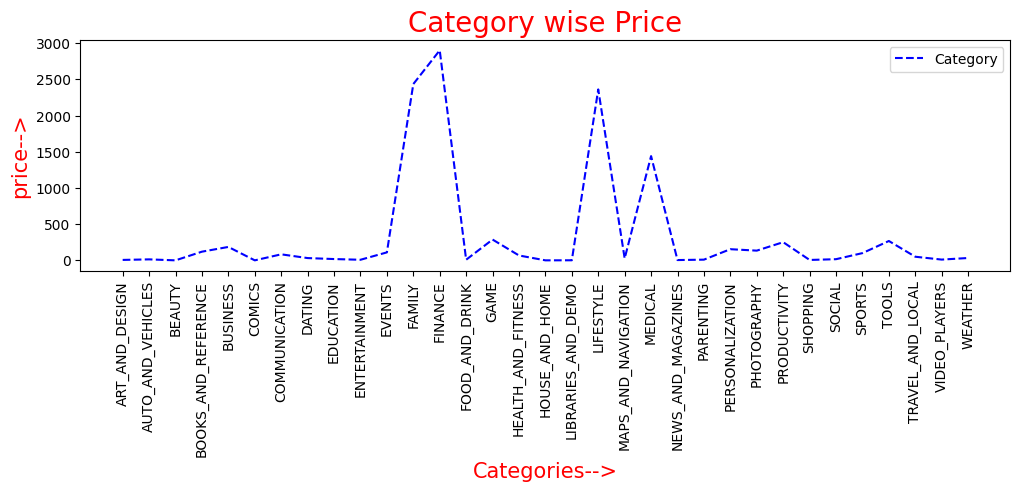

In [ ]:
plt.figure(figsize=(12,3))
plt.plot(y,'r--',color='b',label='Category')
plt.xticks(rotation=90)
plt.title('Category wise Price',color='red',size='20')
plt.xlabel('Categories-->',color='red',size=15)
plt.ylabel('price-->',color='red',size=15)
plt.legend()
plt.savefig('B',bbox_inches='tight')
plt.show()

THE FAMILY,FINANCE,LIFESTYLE CATEGORIES HAVE THE APPS WITH THE HIGHEST COST.
WHERE BEAUTY,ART,PARENTING,WEATHER ARE LEAST.

In [ ]:
df.Type.value_counts()


Free    10039
Paid      800
Name: Type, dtype: int64

In [ ]:
df.Installs.value_counts()

1.000000e+06    1579
1.000000e+07    1252
1.000000e+05    1169
1.000000e+04    1054
1.000000e+03     907
5.000000e+06     752
1.000000e+02     719
5.000000e+05     539
5.000000e+04     479
5.000000e+03     477
1.000000e+08     409
1.000000e+01     386
5.000000e+02     330
5.000000e+07     289
5.000000e+01     205
5.000000e+00      82
5.000000e+08      72
1.000000e+00      67
1.000000e+09      58
0.000000e+00      15
Name: Installs, dtype: int64

No handles with labels found to put in legend.


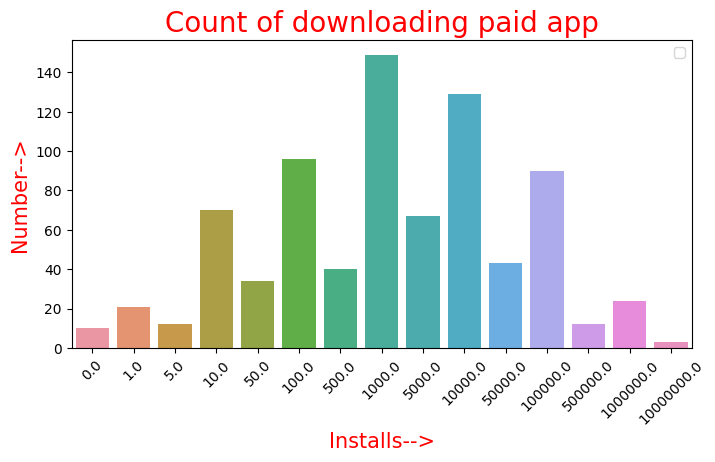

In [ ]:
# Count of downloading paid app's
pa_df=df[df.Type=='Paid']
plt.style.use('default')
plt.figure(figsize=(8,4))
sns.countplot(x='Installs',data=pa_df)
plt.xticks(rotation=45)
plt.title('Count of downloading paid app',color='red',size='20')
plt.xlabel('Installs-->',color='red',size=15)
plt.ylabel('Number-->',color='red',size=15)
plt.legend()
plt.show()

Out of 800 paid app's more than 140 app's those downloading count is 1000.

In [ ]:
a_x=df.groupby(['Category','Type'])['Installs'].mean()
a_x

Category           Type
ART_AND_DESIGN     Free    2.005195e+06
                   Paid    5.333333e+03
AUTO_AND_VEHICLES  Free    6.473178e+05
                   Paid    1.671667e+04
BEAUTY             Free    5.131519e+05
                               ...     
TRAVEL_AND_LOCAL   Paid    1.525500e+04
VIDEO_PLAYERS      Free    3.638557e+07
                   Paid    1.775000e+04
WEATHER            Free    5.747142e+06
                   Paid    1.015000e+05
Name: Installs, Length: 63, dtype: float64

In [ ]:
g=df.groupby('Category')
u=g['Installs'].agg(np.mean)
print(u)

Category
ART_AND_DESIGN         1.912894e+06
AUTO_AND_VEHICLES      6.250613e+05
BEAUTY                 5.131519e+05
BOOKS_AND_REFERENCE    8.318050e+06
BUSINESS               2.178076e+06
COMICS                 9.347692e+05
COMMUNICATION          8.435989e+07
DATING                 1.129533e+06
EDUCATION              5.586231e+06
ENTERTAINMENT          1.925611e+07
EVENTS                 2.495806e+05
FAMILY                 5.201959e+06
FINANCE                2.395215e+06
FOOD_AND_DRINK         2.156683e+06
GAME                   3.066960e+07
HEALTH_AND_FITNESS     4.642441e+06
HOUSE_AND_HOME         1.917187e+06
LIBRARIES_AND_DEMO     7.411284e+05
LIFESTYLE              1.407444e+06
MAPS_AND_NAVIGATION    5.286729e+06
MEDICAL                1.150269e+05
NEWS_AND_MAGAZINES     2.648876e+07
PARENTING              5.253518e+05
PERSONALIZATION        5.932385e+06
PHOTOGRAPHY            3.011417e+07
PRODUCTIVITY           3.343418e+07
SHOPPING               1.249173e+07
SOCIAL             

No handles with labels found to put in legend.


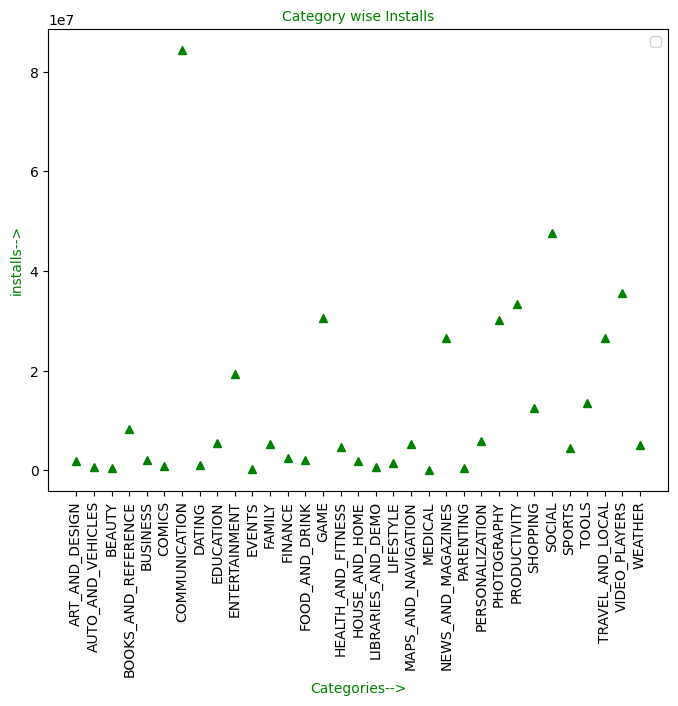

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(u,'g^',color='g')
plt.xticks(rotation=90)
plt.title('Category wise Installs',color='g',size='10')
plt.xlabel('Categories-->',color='g',size=10)
plt.ylabel('installs-->',color='g',size=10)
plt.legend()
plt.show()

The most installed category is Communication and least one is dating,parenting

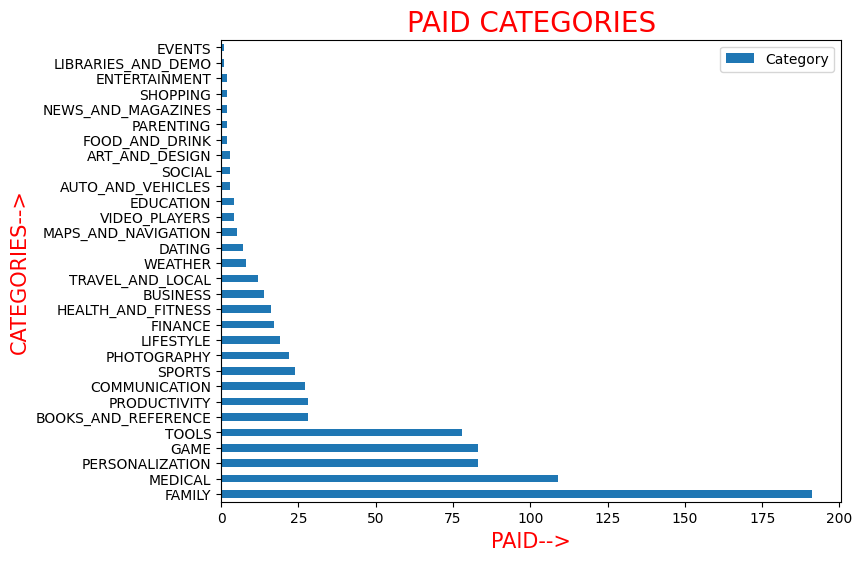

In [ ]:
plt.figure(figsize=(8,6))
df[df['Type']=='Paid']['Category'].value_counts().plot(kind='barh')
plt.title('PAID CATEGORIES',color='red',size='20')
plt.xlabel('PAID-->',color='red',size=15)
plt.ylabel('CATEGORIES-->',color='red',size=15)
plt.legend()


Family category is the most paid type.The tope five paid categories are family,medical,game,tools and personalization. where events,libraries_and demo are least.

More than 80 Percentage of Apps having content rating as everyone

22.6% of the apps out of 10840 apps require android version 4.1 or greater version to work

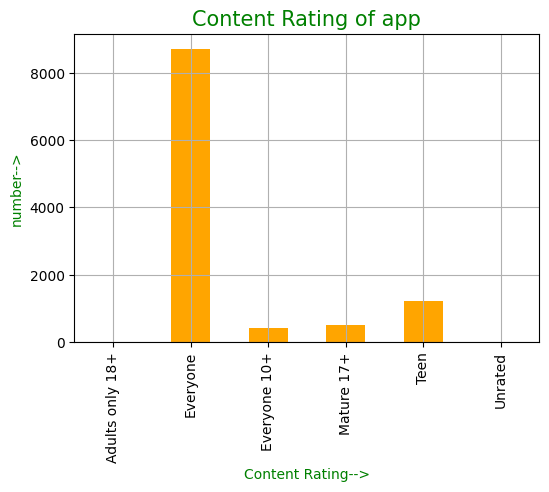

In [ ]:
plt.figure(figsize=(6,4))
df.groupby(['Content Rating'])['Rating'].count().plot.bar(color="orange")
plt.title('Content Rating of app',color='g',size='15')
plt.xlabel('Content Rating-->',color='g',size=10)
plt.ylabel('number-->',color='g',size=10)
plt.grid('True')
plt.show()

More than 80 Percentage of Apps having content rating as everyone

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 600x300 with 0 Axes>

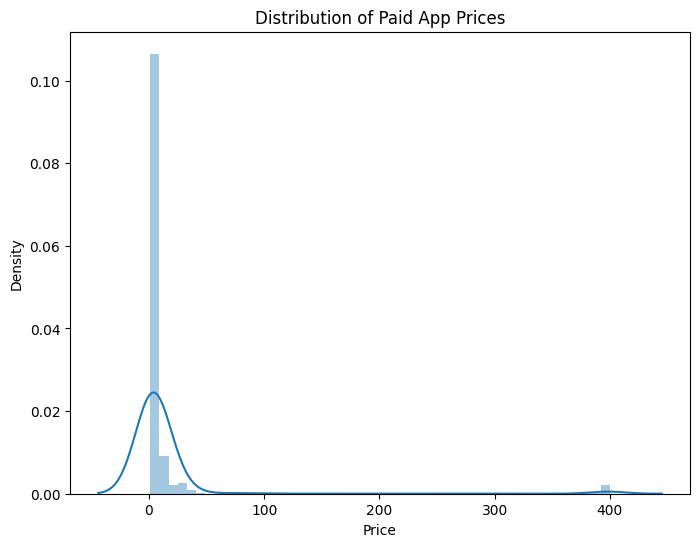

In [ ]:
plt.figure(figsize=(6,3))
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$',''))
df['Price'] = pd.to_numeric(df['Price'])
#Seperating paid apps from free apps

#I have created a seperate dataset for paid apps from the whole playstore dataset

paid_apps = df[df['Price'] != 0]
plt.figure(figsize=(8,6))
plt.title('Distribution of Paid App Prices')
sns.distplot(paid_apps['Price'],bins=50)
plt.show()

more than 85% apps in the play store have a price tag of 10$ or less.some apps have price greater than 350\$

Text(0, 0.5, 'Medical-->')

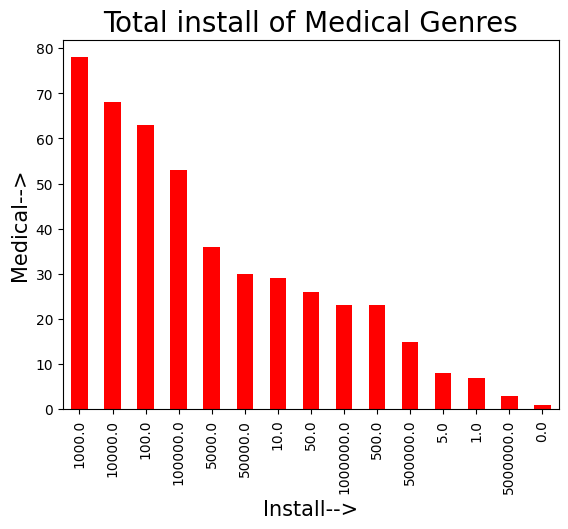

In [ ]:
df[df['Genres']=='Medical']['Installs'].value_counts().plot(kind='bar',color='red')

plt.title('Total install of Medical Genres',color='black',size='20')
plt.xlabel('Install-->',color='black',size=15)
plt.ylabel('Medical-->',color='black',size=15)


The plot shows that the vast majority of medical genres installs are between 1k and 100k installs. 

In [ ]:
df.Genres.value_counts()

Tools                          842
Entertainment                  623
Education                      549
Medical                        463
Business                       460
                              ... 
Strategy;Creativity              1
Card;Brain Games                 1
Music & Audio;Music & Video      1
Comics;Creativity                1
Adventure;Brain Games            1
Name: Genres, Length: 119, dtype: int64

Text(0, 0.5, 'Install-->')

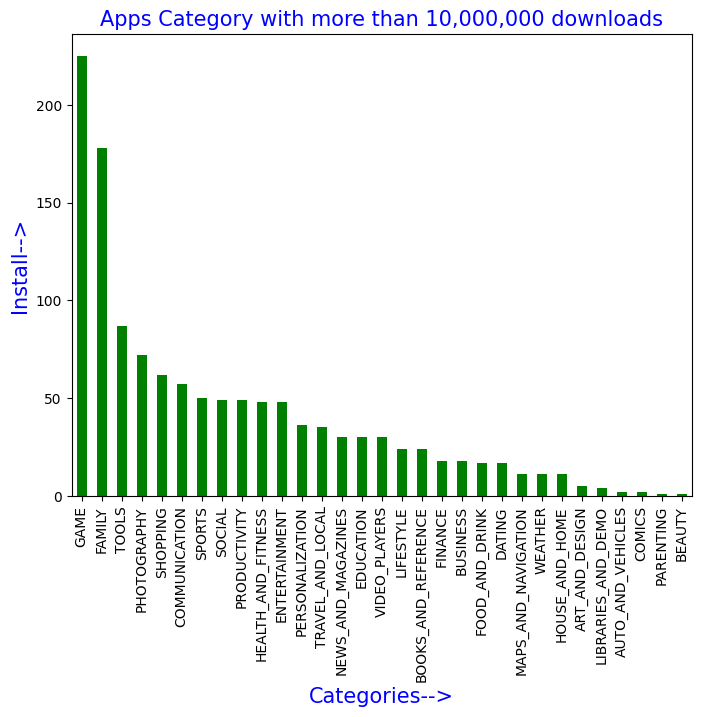

In [ ]:
plt.figure(figsize=(8,6))
df[df['Installs']==10000000]['Category'].value_counts().plot(kind='bar',color='g')

plt.title('Apps Category with more than 10,000,000 downloads',color='b',size='15')
plt.xlabel('Categories-->',color='b',size=15)
plt.ylabel('Install-->',color='b',size=15)


Here is the Category of apps with more than 1 million installs.Here game is toppest and followed by family.The lowest position is beauty category

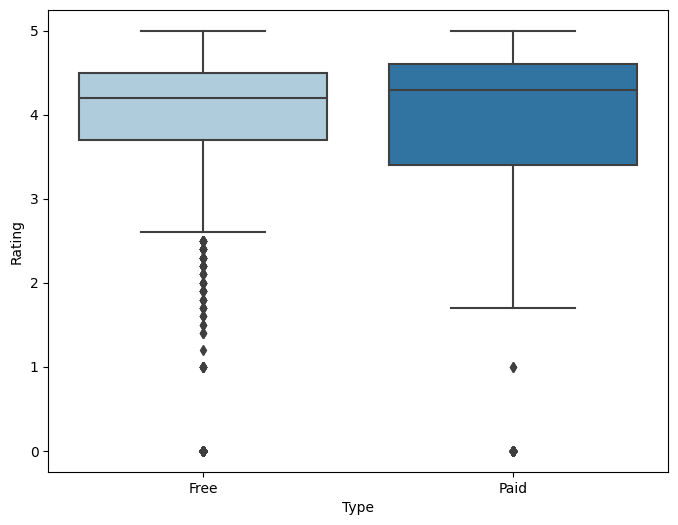

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Type', y='Rating', data= df, palette='Paired')

The boxplot gives the median rating of paid apps and free apps.Where median of free app is about 4.3 and paid app is 4.4 .comapre both gives the median of paid app is high.

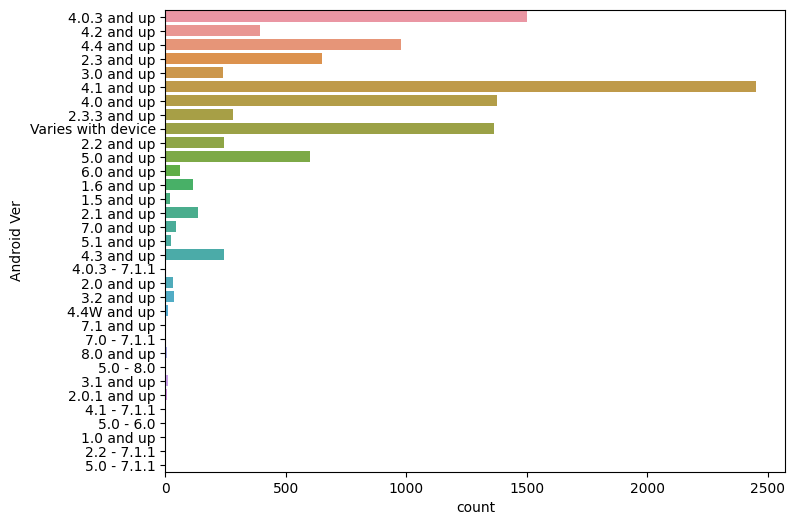

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(y='Android Ver',data=df)

The majority of Android Version of apps is 4.1 and up.

Text(0, 0.5, 'Family_Count-->')

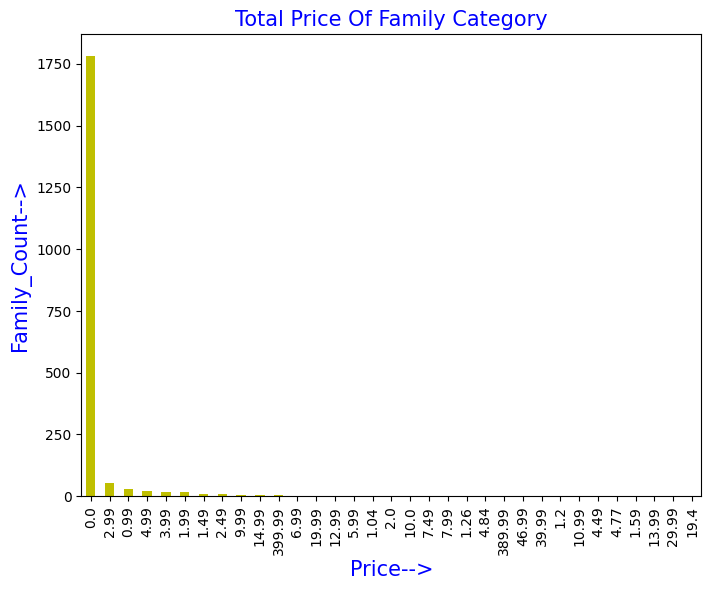

In [ ]:
plt.figure(figsize=(8,6))
df[df['Category']=='FAMILY']['Price'].value_counts().plot(kind='bar',color='y')
plt.title('Total Price Of Family Category',color='b',size='15')
plt.xlabel('Price-->',color='b',size=15)
plt.ylabel('Family_Count-->',color='b',size=15)

Here is the total price of Family Category Apps.More than 95% of family apps those price is 0.

Text(0, 0.5, 'Medical Apps No-->')

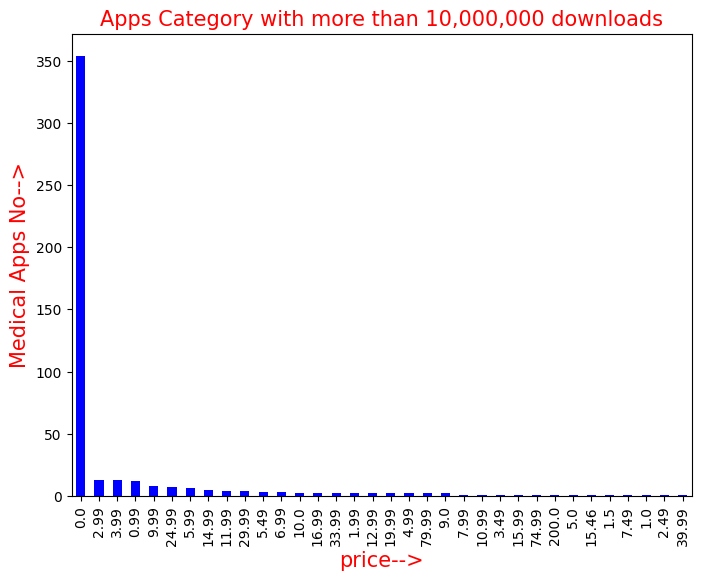

In [ ]:
plt.figure(figsize=(8,6))
df[df['Category']=='MEDICAL']['Price'].value_counts().plot(kind='bar',color='b')
plt.title('Apps Category with more than 10,000,000 downloads',color='r',size='15')
plt.xlabel('price-->',color='r',size=15)
plt.ylabel('Medical Apps No-->',color='r',size=15)

The majority of medical apps is freely available,those price is 0.

In [ ]:
df.corr()

,Rating,Reviews,Installs,Price
Rating,1.000000,0.078602,0.084629,-0.016346
Reviews,0.078602,1.000000,0.643122,-0.009667
Installs,0.084629,0.643122,1.000000,-0.011689
Price,-0.016346,-0.009667,-0.011689,1.000000


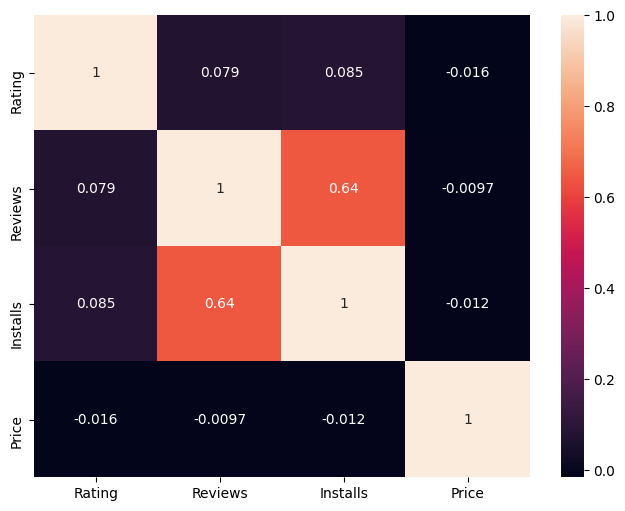

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)

There are 4 numerical columsns in our dataset.The Reviews and Installs are highly correlated.The relation between Price and all other numerical datas are negative ie,There is less correlation occurred

#Inference made from Analysis

* Out of 10841 unique apps in our data set more than 92% are freely available in our play store. 
* Buyers are more willing to pay since there are less resources available

* Both family and game category plays a vital role  in our life. These two are the most number in category. Both rating above 4.1 and installation above 10,00000.
* The  most downloaded paid app’s category is game. By the analysis we can concluded that it will increases in future.
* There are only 53 beauty apps in our sample over 10841 applications , but the thing is its rating is above the average rating.Yet it is the category with the fewest app
* The analysis helps to predict which kind of apps rating high in future.
*The analysis helps to identify the people interest in each category.

